In [ ]:
# B.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
n=256
sigma=1
M=[1,2,4,8,16,32]
x=np.zeros(n)
f=np.zeros(n)
fhat=np.zeros((len(M),n))

In [7]:
for j in range(n):
    x[j] = j/n
    f[j] = 4*np.sin(np.pi*x[j])*np.cos(6*np.pi*x[j]**2)

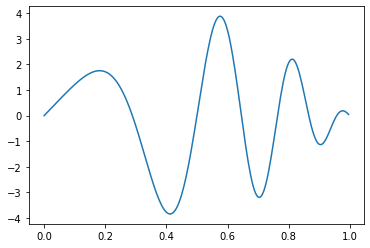

In [10]:
plt.plot(x,f)

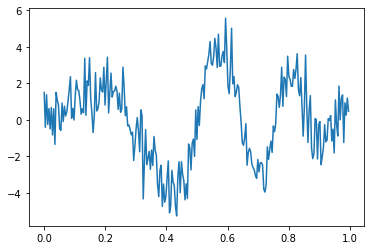

In [13]:
error = np.random.normal(0,1,n)
y = f + error
plt.plot(x,y)

In [58]:
for k in range(len(M)):
    for j in range(int(n/M[k])):
        for i in range(j*M[k],(j+1)*M[k]):
                fhat[k,i] = (1/M[k])*np.sum(y[j*M[k]:(j+1)*M[k]])

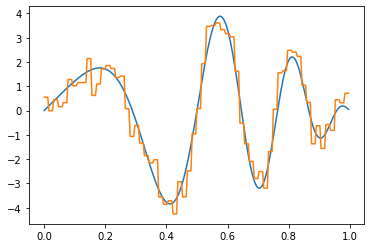

In [64]:
plt.plot(x,f)
#for k in range(len(M)):
#    plt.plot(x,fhat[k,:], label=M[k])
plt.plot(x,fhat[2,:])
#plt.legend()


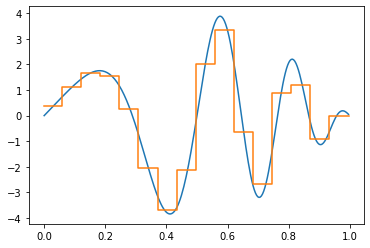

In [70]:
fbar = np.zeros((len(M),n))
for k in range(len(M)):
    for j in range(int(n/M[k])):
        for i in range(j*M[k],(j+1)*M[k]):
            fbar[k,i] = (1/M[k])*np.sum(f[j*M[k]:(j+1)*M[k]])
plt.plot(x,f)
plt.step(x,fbar[4,:])

Text(0, 0.5, 'Value')

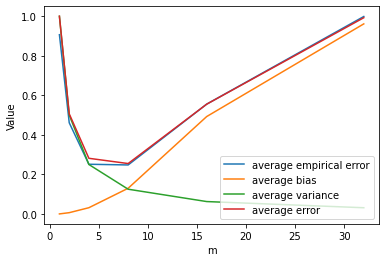

In [76]:
avg_error=np.zeros(len(M))
avg_bias=np.zeros(len(M))
avg_var=np.zeros(len(M))
for k in range(len(M)):
    avg_error[k] = (1/n)*np.sum(np.square(fhat[k,:] - f))
    avg_bias[k] = (1/n)*np.sum(np.square(fbar[k,:] - f))
    avg_var[k] = 1/M[k]
plt.plot(M,avg_error, label="average empirical error")
plt.plot(M,avg_bias,label="average bias")
plt.plot(M,avg_var,label="average variance")
plt.plot(M, avg_bias+avg_var,label="average error")
plt.legend()
plt.xlabel("m")
plt.ylabel("Value")

In [79]:
# A.6 - MNIST

In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def load_dataset():
    mndata = MNIST('/Users/joseph/Courses/cse546/hw1/mnist')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return [X_train,labels_train,X_test,labels_test]

In [47]:
def train(X,Y,lam=0):
    if lam < 0:
        print("Lambda must be positive")
        return
    else:
        return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X) 
                                                 + lam*np.identity(len(X[1,:]))),X.transpose()),Y)

In [65]:
def predict(W,X2):
    m = len(X2[:,1])
    predictions = np.zeros(m)
    for j in range(m):
        x = np.matmul(W.transpose(),X2[j,:].transpose())
        predictions[j] = (np.argmax(x)).astype(int)
    return predictions

In [18]:
[X_train,labels_train,X_test,labels_test]=load_dataset()

In [71]:
n=len(X_train[:,1])
d=len(X_train[1,:])
k=10
m=len(X_test[:,1])
Y=np.zeros((n,k))
for j in range(n):
    Y[j,labels_train[j]] = 1

In [72]:
lam = 10**(-4)
What = train(X_train,Y,lam)
pred_train = predict(What,X_train)
pred_test = predict(What,X_test)

In [74]:
error_train=0
error_test=0

for j in range(n):
    if pred_train[j] != labels_train[j]:
        error_train = error_train + 1
for j in range(m):
    if pred_test[j] != labels_test[j]:
        error_test = error_test + 1

error_train = error_train / n
error_test = error_test / m

In [78]:
print(error_train)
print(error_test)

0.14805
0.1466


In [ ]:
# B.2

In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    mndata = MNIST('/Users/joseph/Courses/cse546/hw1/mnist')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return [X_train,labels_train,X_test,labels_test]

[X_train,labels_train,X_test,labels_test]=load_dataset()

In [3]:
def train(X,Y,lam=0):
    if lam < 0:
        print("Lambda must be positive")
        return
    else:
        return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X) 
                                                 + lam*np.identity(len(X[1,:]))),X.transpose()),Y)

In [4]:
def predict(W,X2):
    m = len(X2[:,1])
    predictions = np.zeros(m)
    for j in range(m):
        x = np.matmul(W.transpose(),X2[j,:].transpose())
        predictions[j] = np.argmax(x)
    return predictions

In [22]:
P=[(j+1)*30 for j in range(20)] #P=[100,200,...,3000]
d=784
n=60000
k=10
lam=10**(-4)
mu=0
sigma=np.sqrt(.1)

#create validation and training sets
perm = np.random.permutation(np.arange(n))
validation_data = X_train[perm[0:12000],:]
training_data = X_train[perm[12000:n],:]

#create labels matrix Y
Y=np.zeros((n,k))
for j in range(n):
    Y[j,labels_train[j]] = 1
Y_train=Y[perm[12000:n],:]
labels_val=labels_train[perm[0:12000]]
labels_train_sub=labels_train[perm[12000:n]]

In [23]:
errors_val = np.zeros(len(P))
errors_train = np.zeros(len(P))
counter=0
for p in P:
    G=np.random.normal(0,sigma,size=(p,d))
    b=np.random.uniform(0,2*np.pi,p)
    h_x_train = np.matmul(G,training_data.transpose())
    h_x_val = np.matmul(G,validation_data.transpose())
    for j in range(p):
        h_x_train[:,j] = np.cos(h_x_train[:,j] + b)
        h_x_val[:,j] = np.cos(h_x_val[:,j] + b)
    h_x_train = h_x_train.transpose()
    h_x_val = h_x_val.transpose()
    
    What = train(h_x_train,Y_train,lam)
    pred_train = predict(What,h_x_train)
    pred_val = predict(What,h_x_val)
    
    error_train=0
    error_val=0
    for j in range(48000):
        if pred_train[j] != labels_train_sub[j]:
            error_train = error_train + 1
    for j in range(12000):
        if pred_val[j] != labels_val[j]:
            error_val = error_val + 1

    errors_train[counter] = error_train / 48000
    errors_val[counter] = error_val / 12000
    
    counter = counter + 1

Text(0, 0.5, 'Error')

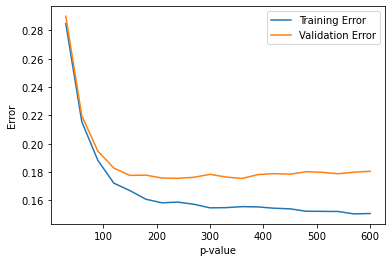

In [24]:
plt.plot(P,errors_train,label="Training Error")
plt.plot(P,errors_val,label="Validation Error")
plt.legend()
plt.xlabel("p-value")
plt.ylabel("Error")

In [34]:
phat=250
G=np.random.normal(0,sigma,size=(phat,d))
b=np.random.uniform(0,2*np.pi,phat)
h_x=np.matmul(G,X_train.transpose())
h_x_test=np.matmul(G,X_test.transpose())
for j in range(phat):
    h_x[:,j] = np.cos(h_x[:,j]+b)
    h_x_test[:,j] = np.cos(h_x_test[:,j]+b)
h_x = h_x.transpose()
h_x_test = h_x_test.transpose()
What = train(h_x,Y,lam)
predictions = predict(What,h_x_test)

In [35]:
error_test_phat=0
for j in range(len(X_test[:,1])):
    if predictions[j] != labels_test[j]:
        error_test_phat = error_test_phat + 1
error_test_phat = error_test_phat / len(X_test[:,1])
error_test_phat


0.1679

In [ ]:
# A.4 - Polynomial Regression

In [3]:
import numpy as np

class PolynomialRegression:

    def __init__(self, degree=1, reg_lambda=1E-8, means=0, std_dev=0 ):
        """
        Constructor
        """
        self.regLambda = reg_lambda
        self.degree = degree
        self.theta = None
        self.means = None
        self.std_dev = None

    def polyfeatures(self, X, degree):
        """
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d numpy array, with each row comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 column numpy array
            degree is a positive integer
        """
        X_ = X
        for j in range(2,degree+1):
            X_ = np.c_[X_, np.power(X,j)] #adds powers of X to the right
        
        return X_

    def fit(self, X, y):
        """
            Trains the model
            Arguments:
                X is a n-by-1 array
                y is an n-by-1 array
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling
                at first
        """
        n = len(X)
        d = self.degree
        
        #standardize data
        self.means = np.zeros([d,1])
        self.std_dev = np.zeros([d,1])
        
        X = self.polyfeatures(X,d)
        
        for j in range(d):
            self.means[j] = np.mean(X[:,j])
            self.std_dev[j] = np.std(X[:,j])
            if self.std_dev[j] == 0:
                self.std_dev[j] = 1
            for i in range(n):
                X[i,j] = (X[i,j]-self.means[j])/self.std_dev[j]
        
        X_ = np.c_[np.ones([n,1]),X]
        
        # construct reg matrix
        reg_matrix = self.regLambda * np.eye(d + 1)
        reg_matrix[0, 0] = 0

        # analytical solution (X'X + regMatrix)^-1 X' y
        self.theta = np.linalg.pinv(X_.T.dot(X_) + reg_matrix).dot(X_.T).dot(y)

    def predict(self, X):
        """
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        """
        n = len(X)
        d = self.degree
        
        #standardize data
        X = self.polyfeatures(X,d)
        for j in range(d):
            for i in range(n):
                X[i,j] = (X[i,j]-self.means[j])/self.std_dev[j]
                
        X = np.c_[np.ones([n,1]),X]
        
        return X.dot(self.theta)

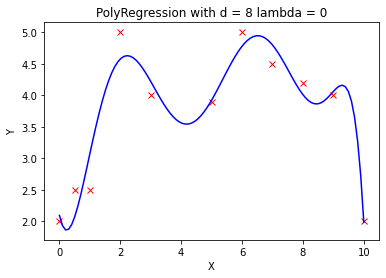

In [4]:
"""
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
"""

import numpy as np
import matplotlib.pyplot as plt

# load the data
filePath = "data/polydata.dat"
file = open(filePath,'r')
allData = np.loadtxt(file, delimiter=',')

X = allData[:, [0]]
y = allData[:, [1]]

# regression with degree = d
d = 8
lam = 0
model = PolynomialRegression(degree=d, reg_lambda=lam)
model.fit(X, y)

# output predictions
xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
ypoints = model.predict(xpoints)

# plot curve
plt.figure()
plt.plot(X, y, 'rx')
plt.title('PolyRegression with d = '+str(d)+' lambda = '+str(lam))
plt.plot(xpoints, ypoints, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# A.5

In [1]:
import numpy as np

In [2]:
def learningCurve(Xtrain, Ytrain, Xtest, Ytest, reg_lambda, degree):
    """
    Compute learning curve
    Arguments:
        Xtrain -- Training X, n-by-1 matrix
        Ytrain -- Training y, n-by-1 matrix
        Xtest -- Testing X, m-by-1 matrix
        Ytest -- Testing Y, m-by-1 matrix
        regLambda -- regularization factor
        degree -- polynomial degree
    Returns:
        errorTrain -- errorTrain[i] is the training accuracy using
        model trained by Xtrain[0:(i+1)]
        errorTest -- errorTrain[i] is the testing accuracy using
        model trained by Xtrain[0:(i+1)]
    Note:
        errorTrain[0:1] and errorTest[0:1] won't actually matter, since we start 
        displaying the learning curve at n = 2 (or higher)
    """
    n = len(Xtrain)

    errorTrain = np.zeros(n)
    errorTest = np.zeros(n)
    
    d = degree
    lam = reg_lambda

    for j in range(n):
        model = PolynomialRegression(degree=d, reg_lambda=lam)
        model.fit(Xtrain[0:j+1], Ytrain[0:j+1])
        prediction_train = model.predict(Xtrain[0:j+1])
        prediction_test = model.predict(Xtest)
        
        errorTrain[j] = np.sum(np.square(Ytrain[0:j+1] - prediction_train)) / len(Xtrain[0:j+1])
        errorTest[j] = np.sum(np.square(Ytest - prediction_test)) / len(Xtest)

    return errorTrain, errorTest

In [1]:
"""
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

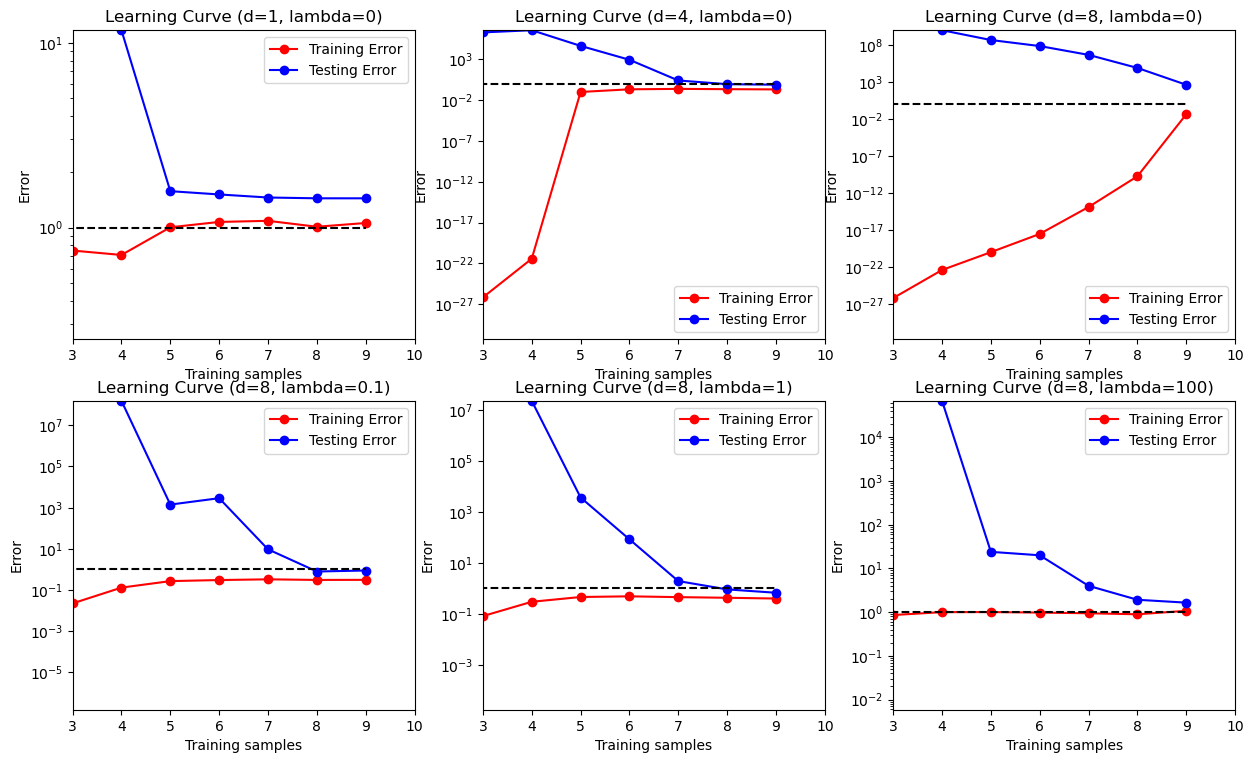

In [5]:
#----------------------------------------------------
# Plotting tools

def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    """
        plot computed learning curve
    """
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')
    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')
    plt.legend(['Training Error', 'Testing Error'], loc='best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim(top=maxY)
    plt.xlim((minX, 10))


def generateLearningCurve(X, y, degree, regLambda):
    """
        computing learning curve via leave one out CV
    """

    n = len(X)

    errorTrains = np.zeros((n, n-1))
    errorTests = np.zeros((n, n-1))

    loo = model_selection.LeaveOneOut()
    itrial = 0
    for train_index, test_index in loo.split(X):
        #print("TRAIN indices:", train_index, "TEST indices:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, regLambda, degree)

        errorTrains[itrial, :] = errTrain
        errorTests[itrial, :] = errTest
        itrial = itrial + 1

    errorTrain = errorTrains.mean(axis=0)
    errorTest = errorTests.mean(axis=0)

    plotLearningCurve(errorTrain, errorTest, regLambda, degree)




#-----------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, [0]]
    y = allData[:, [1]]

    # generate Learning curves for different params
    plt.figure(figsize=(15, 9), dpi=100)
    plt.subplot(2, 3, 1)
    generateLearningCurve(X, y, 1, 0)
    plt.subplot(2, 3, 2)
    generateLearningCurve(X, y, 4, 0)
    plt.subplot(2, 3, 3)
    generateLearningCurve(X, y, 8, 0)
    plt.subplot(2, 3, 4)
    generateLearningCurve(X, y, 8, .1)
    plt.subplot(2, 3, 5)
    generateLearningCurve(X, y, 8, 1)
    plt.subplot(2, 3, 6)
    generateLearningCurve(X, y, 8, 100)
    plt.show()